In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing dataset

In [3]:
df=pd.read_csv('mushrooms.csv')

In [4]:
#how big is your dataset
df.shape

(8124, 23)

In [5]:
#how does the data looks like
#df.head()
df.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1086,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3248,p,x,f,g,f,f,f,c,b,g,...,k,b,n,p,w,o,l,h,y,g
1866,e,x,y,n,t,n,f,c,b,u,...,s,p,w,p,w,o,p,n,v,d
594,e,x,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
3588,e,f,f,g,t,n,f,c,b,p,...,s,p,p,p,w,o,p,n,v,d


In [6]:
#What are the datatypes of column

#just general info of dataset like dtypes of all features,null count
df.info()

#conclusion I can see of features have dtype=object means all can be either categorical or Text,
#along with that for all columns count is 8124 ,hence no missing values can be seen initially
#How ring number is object??? since it's sounds like numerical should be int32

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
#are there any missing values

df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
#how does the data looks like mathematically,describe() is only applicable yo numeric columns 25%,mean,median,50%,75%
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
#Are there any duplicate rows?

df.duplicated().sum()

0

In [9]:
#is there any correlatio0n between the ip and op features? df.corr() works only on numeric column
df.corr()

""


In [10]:
# check dataset is balanced or imbalanced 



#here dataset is balanced
print(df['class'].value_counts()  )

df['class'].value_counts(normalize=True) #percentage 51 and 48 nearly equal/same

e    4208
p    3916
Name: class, dtype: int64


e    0.517971
p    0.482029
Name: class, dtype: float64

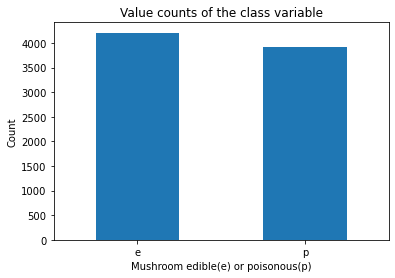

In [11]:
df['class'].value_counts().plot(kind="bar")
plt.title("Value counts of the class variable")
plt.xlabel("Mushroom edible(e) or poisonous(p)")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [12]:
for i in df.columns:
    print('{} : {}'.format(i,df[i].unique()))      

class : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [13]:
for i in df.columns:
    print(df[i].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

# Handling  categorical missing values

# Column :stalk-root

#stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?


find reason behind missing values from dataset domain knowledge(discuss with domain experts also) and handle accordingly.
a.either they are not recorded.(use imputation methods vagire) 
b.either they are not exists.(put 0 vagire for missing val)

for this project I couldn't able to find exacct reason behind missing values ,so I am doing below methods experiments and whichever gives best results(for MLmodel ) will select finally that one.


Each  method has its own advantages+disadvantages.

# Methods for categorical column.
1.Drop/delete column
2.Drop the rows of dataset contains that missing values.
3.imputation by most frequent value/by mode.
4.use another catagory as "unknown"
5.add extra column and fill only missing values.

b    0.464796
?    0.305268
e    0.137863
c    0.068439
r    0.023634
Name: stalk-root, dtype: float64


([<matplotlib.patches.Wedge at 0xbac9a89fd0>,
 [Text(-1.0932793442066577, 0.12140953640905079, 'b'),
  Text(0.7399551014570356, -0.8139204186084216, '?'),
  Text(0.9324619235364265, 0.5835364265877047, 'e'),
  Text(0.39110532775552526, 1.028122863572853, 'c'),
  Text(0.0815970314240834, 1.0969694273145343, 'r')],
 [Text(-0.596334187749086, 0.06622338349584588, '46.48'),
  Text(0.4036118735220194, -0.44395659196822995, '30.53'),
  Text(0.5086155946562326, 0.3182925963205661, '13.79'),
  Text(0.21333017877574104, 0.560794289221556, '6.84'),
  Text(0.044507471685863664, 0.5983469603533823, '2.36')])

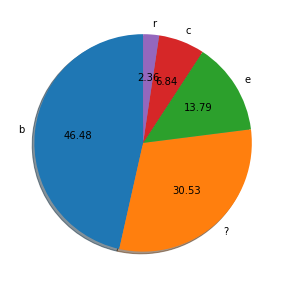

In [14]:
print(df['stalk-root'].value_counts(normalize=True))
plt.figure(figsize=(5,5))
plt.pie(df['stalk-root'].value_counts(),startangle=90,autopct='%.2f',
       labels=['b','?','e','c','r'],shadow=True)

#since 30% entries of stalk-root= ? i.e null/missing values
#Can't drop column,only 30% are missing,if more than 50% missing then you can drop the column
#can't drop the rows,30% rows means large,the entire 30% rows of mushroom dataset will be delete,we will lose out data

In [15]:
#replacement by mode
df['stalk-root'].replace('?', np.nan,inplace=True)
print(df.isna().sum())
print(df['stalk-root'].unique())

df_1=df.copy()
mode = df_1["stalk-root"].mode() 
df_1['stalk-root'].fillna(mode.iloc[0],inplace=True)
print(df_1['stalk-root'].value_counts())

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64
['e' 'c' 'b' 'r' nan]
b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64


In [ ]:
#replacing gill number features as it sounds numerical but given as categorical one,two,one ---> 1,2,0
#No need it because remaining features are categorical ,let's keep it categorical

In [16]:
#Feature Selection


#veil type has only one category,so do I need to keep it or remove it?
df_1.drop(['veil-color','stalk-shape','veil-type','gill-attachment'],axis=1,inplace=True)

# Feature Selection

Using stalk-color-above ring,below ring and veil color,we can calculate the gill attachment,association val(0.97,.97,.87)
hence leads to multicollinearity,so rather than dropping three ,i'll drop gill -attachment.


stalk-shape has very very less correlation or association with output features class (0.01 hence drop it.


veil-color has collinearity with two others features,hence drop it.


odor is very useful to calculate the class .i.e. .97


veil-type has single category only,hence delete it

In [17]:
df_1.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# EDA

In [ ]:
for cat-cat features you can use countplot(),piechart(),crosstab(),pivottable(),clustermap()

In [ ]:
#find correlation between variables and if correlation between
 #ip -ip features is very strong >0.9 then delete one of them
    
#also ip -op features ,strong then that ip feature is very useful for classification

#ip-ip correlation means multicollinearity
# to find ip-op correlation for cat-cat :use chi2,mutual information
#to find both use cramer's v

# EDA STEPS


1.Data Quality Check: 
Can be done using pandas library functions like describe(), info(), dtypes(), etc. It is used to find several features, its datatypes, duplicate values, missing value, etc.


2.Statistical Test:
Some statistical tests like Pearson correlation, Spearman correlation, Kendall test, etc are done to get a correlation between the features. It can be implemented in python using the stats library.
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9


3.Quantitative Test: 
Some quantitative test is used to find the spread of numerical features, count of categorical features. It can be implemented in python using the functions of the pandas library.


4.Visualization:

Feature visualization is very essential to get an understanding of the data. Graphical techniques like bar plots, pie charts are used to get an understanding of categorical features, whereas scatter plots, histograms are used for numerical features.

5.Brainstorming:
Asking the right questions is what separates a good data analyst from a mediocre one. We may be experts with the tools and tech, but these skills are relatively useless if we are unable to retrieve information from the data.

Asking the right questions allows the analyst to “be in sync” with the stakeholder, or to implement a predictive model that really works.


usually do some domain knowledge study for the brainstorming(talk with domain experts,google).

a. find myths/misconceptions about that dataset/project/features ; then do relevant EDA(queries+plots) on same features
Check whether EDA results prove myths are True or False,and accordingy finalize your EDA conclusion. 

b.using plots/hypotheis test find other insights/pattern/anamolies/trend in dataset.

in above both steps ask many questions to yourself,find answers of same,
then at the end select only those questions which are 100% useful /vital importance/relevance for project aim.

# Categorical Features EDA

1.Data Quality Check: Done

2.Statistical test: 

a.df.describe()
b.measure of central tendancy- Mode()

In [33]:
for i in df.columns:
       print(i,':',df[i].mode()[0],    sum(df[i] == df[i].mode()[0])     )
        
        
print(sum(df['class']=='e'))
print(df['class'].value_counts().e)
(df['class'] == df['class'].mode()[0]).sum()

con=df['class'].mode()[0]
print(con)
print(df['class'].value_counts())

class : e 4208
cap-shape : x 3656
cap-surface : y 3244
cap-color : n 2284
bruises : f 4748
odor : n 3528
gill-attachment : f 7914
gill-spacing : c 6812
gill-size : b 5612
gill-color : b 1728
stalk-shape : t 4608
stalk-root : b 3776
stalk-surface-above-ring : s 5176
stalk-surface-below-ring : s 4936
stalk-color-above-ring : w 4464
stalk-color-below-ring : w 4384
veil-type : p 8124
veil-color : w 7924
ring-number : o 7488
ring-type : p 3968
spore-print-color : w 2388
population : v 4040
habitat : d 3148
4208
4208
e
e    4208
p    3916
Name: class, dtype: int64


In [19]:
df_1.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,12,4,4,4,9,9,3,5,9,6,7
top,e,x,y,n,f,n,c,b,b,b,s,s,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,6812,5612,1728,6256,5176,4936,4464,4384,7488,3968,2388,4040,3148


In [38]:
col=a.columns[1:]
col

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [20]:
df_1.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

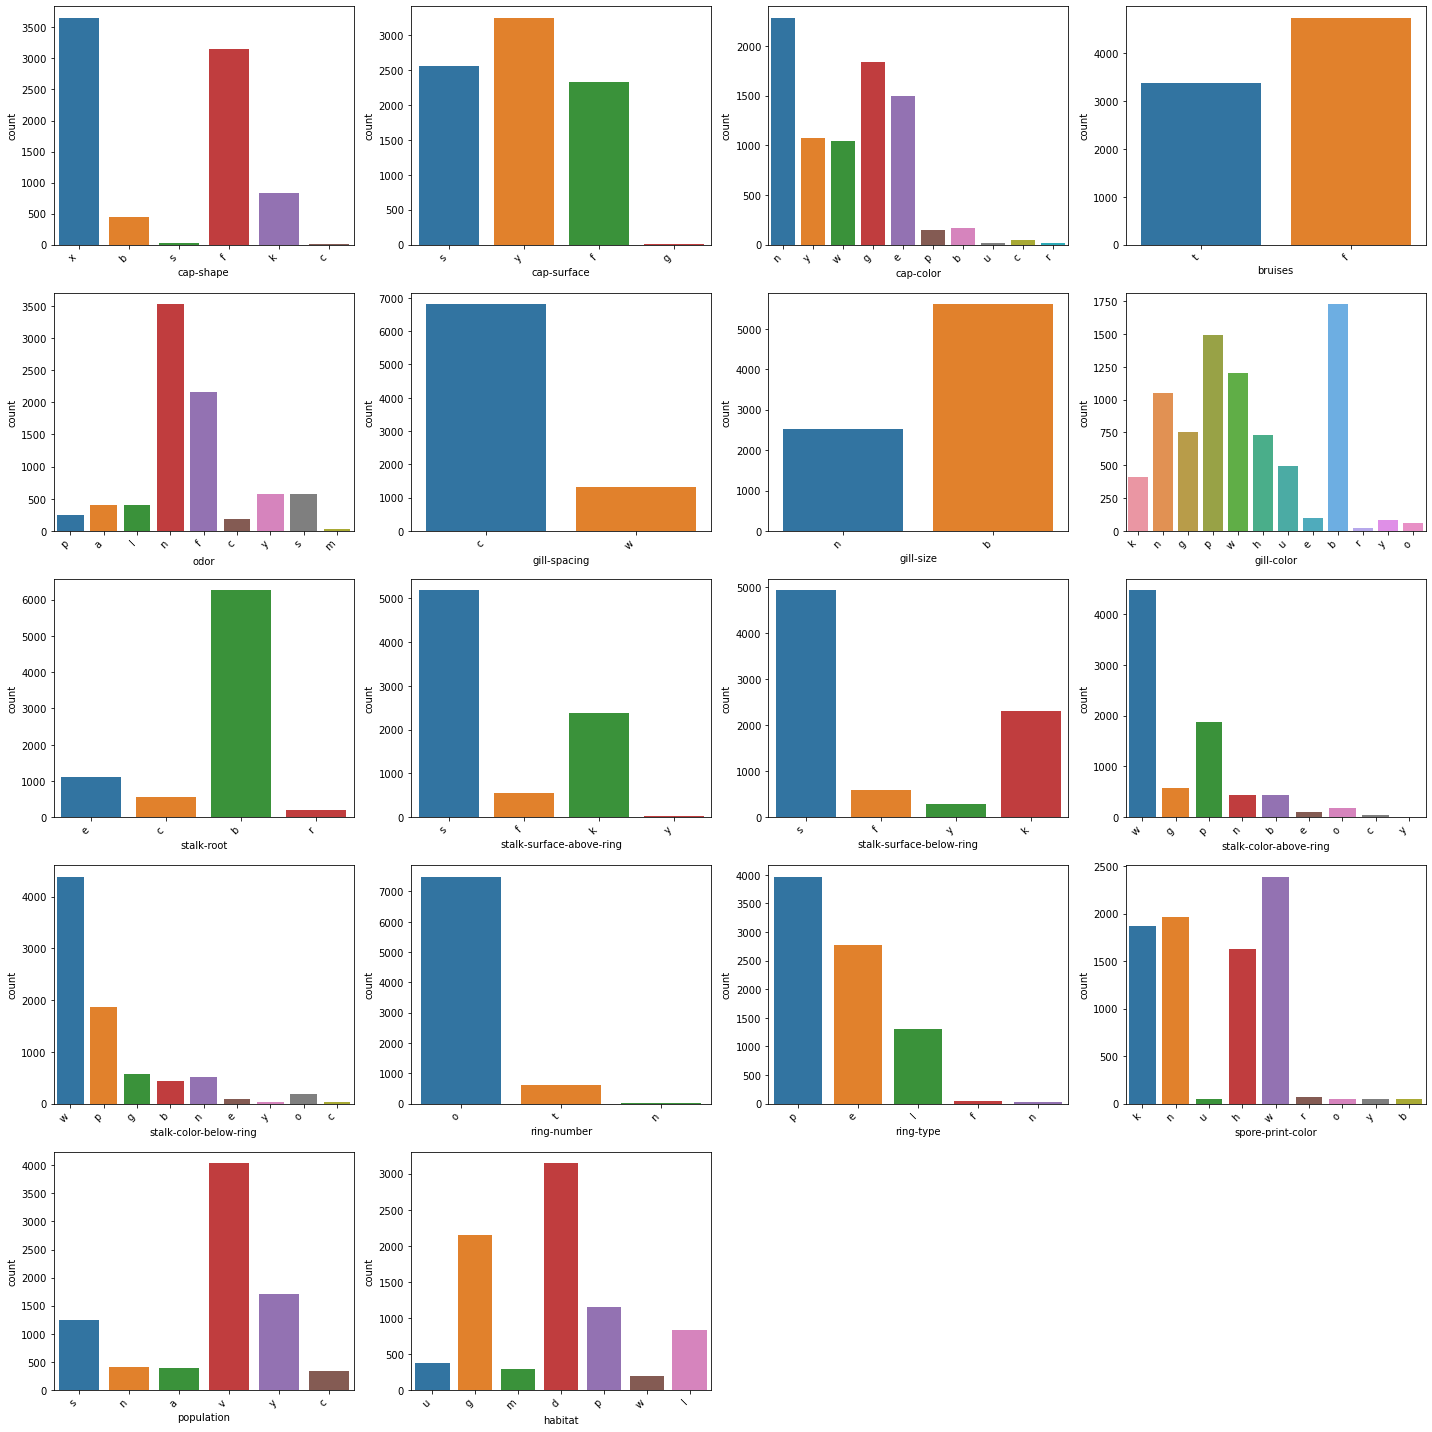

In [23]:
cols = 4
rows = 5
fig = plt.figure(figsize= (20,20))


# df.describe  nunique().
#since entire df is of objects hence   all_cats = cars.select_dtypes(include='object')not done

#cat_cols = df_1.columns[df_1.nunique() >2]   
cat_cols =df_1.columns[1:]
 
for i, col in enumerate(cat_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.countplot(x=df_1[col], ax=ax)
    
    plt.xticks(rotation=45, ha='right')
    
fig.tight_layout()  
plt.show()

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

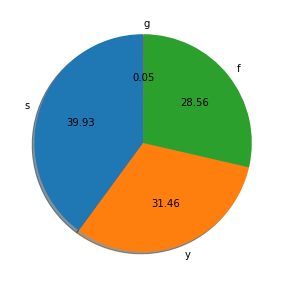

In [23]:
plt.figure(figsize=(5,5))
plt.pie(df['cap-surface'].value_counts(),startangle=90,autopct='%.2f',
        labels=['s','y','f','g'],shadow=True)

#Pie charts are not very popular with the visualization community. For one, the graph appears cluttered when the groups exceed four. Two, sometimes the widths for the slices are not intuitively clear.

df['cap-surface'].value_counts()

<AxesSubplot:title={'center':'cap-surface'}, ylabel='cap-surface'>

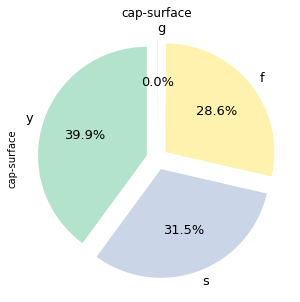

In [43]:
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 13,
    explode    = (0.1,0.1,0.1,0.1),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'cap-surface')
df['cap-surface'].value_counts().plot.pie(**kwargs)

In [26]:
cat_cols=list(df_1.columns)
cat_cols=cat_cols[1:]


# Graphical Bivariate Analysis of Categorical Variables vs Categorical Variables:


each ip feature with output feature

# Myths Bursted:


1.Generally it is said that mushroom grows on woods are harmless,but after EDA this myth is bursted since
60% are edible but 40% mushroom grows on woods are poisonous.

2.Mushrooms grows(habitat) on wood are 70% are poisonous and they are grows in several population.


3.whenever odor is none/n,96%chances mushrooms are edible.wheneber odor=fishy,mushrooms are always poisonus.

4.Its people assumption that Mushrooms whose has not odor are edible,but those mushrooms grows on wood in several population,so its cleared that they are poisonous(4% chances).

5. Whenever mushrooms gill size=b/broad,it means 70%chances they are edible.  

In [105]:
print(pd.crosstab(df_1['population'],df_1['class'],margins=True))

all=pd.crosstab(df_1['population'],df_1['class'],margins=True)['All']
pd.crosstab(df_1['population'],df_1['class']).divide(all,axis=0).dropna()

class          e     p   All
population                  
a            384     0   384
c            288    52   340
n            400     0   400
s            880   368  1248
v           1192  2848  4040
y           1064   648  1712
All         4208  3916  8124


class,e,p
population,,
a,1.000000,0.000000
c,0.847059,0.152941
n,1.000000,0.000000
s,0.705128,0.294872
v,0.295050,0.704950
y,0.621495,0.378505


d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64


<AxesSubplot:xlabel='habitat', ylabel='count'>

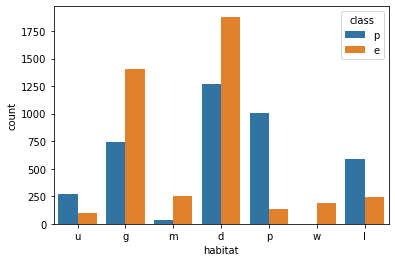

In [28]:
print(df_1['habitat'].value_counts())

sns.countplot(data=df_1,x='habitat',hue='class') 

In [29]:
print(pd.crosstab(df_1['habitat'],df_1['class'],margins=True))
all=pd.crosstab(df_1['habitat'],df_1['class'],margins=True)['All']
pd.crosstab(df_1['habitat'],df_1['class']).divide(all,axis=0).dropna() 



class       e     p   All
habitat                  
d        1880  1268  3148
g        1408   740  2148
l         240   592   832
m         256    36   292
p         136  1008  1144
u          96   272   368
w         192     0   192
All      4208  3916  8124


class,e,p
habitat,,
d,0.597205,0.402795
g,0.655493,0.344507
l,0.288462,0.711538
m,0.876712,0.123288
p,0.118881,0.881119
u,0.260870,0.739130
w,1.000000,0.000000


<AxesSubplot:xlabel='habitat', ylabel='count'>

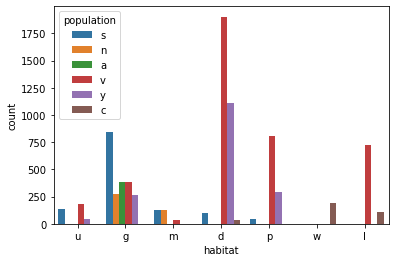

In [109]:
sns.countplot(data=df_1,x='habitat',hue='population') 

In [110]:
print(pd.crosstab(df_1['habitat'],df_1['population'],margins=True))
all=pd.crosstab(df_1['habitat'],df_1['population'],margins=True)['All'] 
pd.crosstab(df_1['habitat'],df_1['population']).divide(all,axis=0).dropna() 

population    a    c    n     s     v     y   All
habitat                                          
d             0   36    0    96  1904  1112  3148
g           384    0  272   840   388   264  2148
l             0  112    0     0   720     0   832
m             0    0  128   128    36     0   292
p             0    0    0    48   808   288  1144
u             0    0    0   136   184    48   368
w             0  192    0     0     0     0   192
All         384  340  400  1248  4040  1712  8124


population,a,c,n,s,v,y
habitat,,,,,,
d,0.000000,0.011436,0.000000,0.030496,0.604828,0.353240
g,0.178771,0.000000,0.126629,0.391061,0.180633,0.122905
l,0.000000,0.134615,0.000000,0.000000,0.865385,0.000000
m,0.000000,0.000000,0.438356,0.438356,0.123288,0.000000
p,0.000000,0.000000,0.000000,0.041958,0.706294,0.251748
u,0.000000,0.000000,0.000000,0.369565,0.500000,0.130435
w,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


class     e     p   All
odor                   
a       400     0   400
c         0   192   192
f         0  2160  2160
l       400     0   400
m         0    36    36
n      3408   120  3528
p         0   256   256
s         0   576   576
y         0   576   576
All    4208  3916  8124
class         e         p
odor                     
a      1.000000  0.000000
c      0.000000  1.000000
f      0.000000  1.000000
l      1.000000  0.000000
m      0.000000  1.000000
n      0.965986  0.034014
p      0.000000  1.000000
s      0.000000  1.000000
y      0.000000  1.000000
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64


<AxesSubplot:xlabel='odor', ylabel='count'>

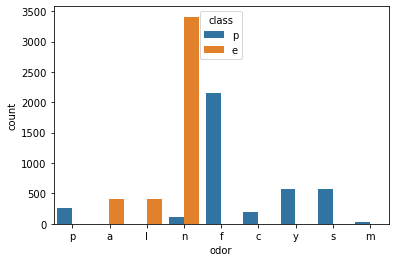

In [31]:
print(pd.crosstab(df_1['odor'],df['class'],margins=True))
all=pd.crosstab(df_1['odor'],df['class'],margins=True)['All'] 
print(pd.crosstab(df_1['odor'],df['class']).divide(all,axis=0).dropna() )


print(df_1['odor'].value_counts())# as a poisouns so INDICATIVE FEA
sns.countplot(data=df_1,x='odor',hue='class')


<AxesSubplot:xlabel='population', ylabel='count'>

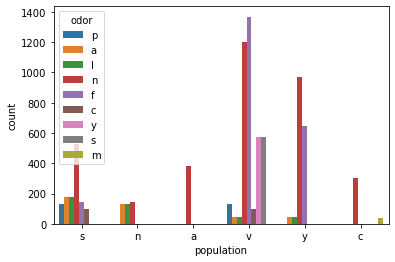

In [37]:
sns.countplot(data=df_1,x='population',hue='odor') 

<AxesSubplot:xlabel='odor', ylabel='count'>

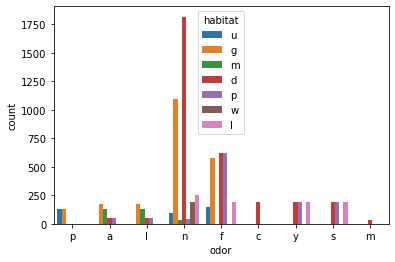

In [36]:
sns.countplot(data=df_1,x='odor',hue='habitat') 

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
class             e         p
cap-color                    
b          0.285714  0.714286
c          0.727273  0.272727
e          0.416000  0.584000
g          0.560870  0.439130
n          0.553415  0.446585
p          0.388889  0.611111
r          1.000000  0.000000
u          1.000000  0.000000
w          0.692308  0.307692
y          0.373134  0.626866


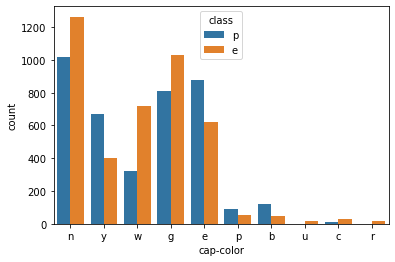

In [124]:
print(df_1['cap-color'].value_counts())

sns.countplot(data=df_1,x='cap-color',hue='class')

all=pd.crosstab(df_1['cap-color'],df['class'],margins=True)['All'] 
print(pd.crosstab(df_1['cap-color'],df['class']).divide(all,axis=0).dropna() )

<AxesSubplot:xlabel='cap-color', ylabel='count'>

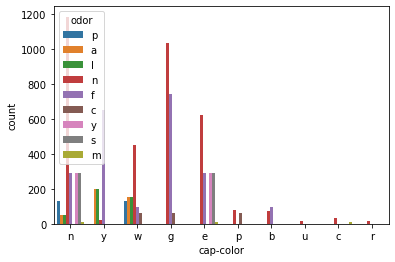

In [125]:
sns.countplot(data=df_1,x='cap-color',hue='odor')# when cap color=red,odor=none

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64


<AxesSubplot:xlabel='cap-shape', ylabel='count'>

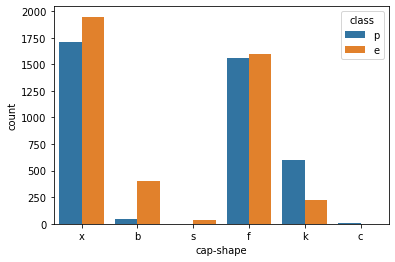

In [126]:
print(df_1['cap-shape'].value_counts())
sns.countplot(data=df_1,x='cap-shape',hue='class') #NOT INDICATIVE

f    4748
t    3376
Name: bruises, dtype: int64
class           e         p
bruises                    
f        0.306655  0.693345
t        0.815166  0.184834


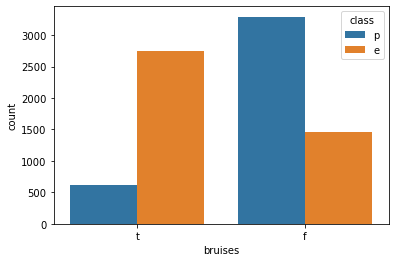

In [128]:
print(df_1['bruises'].value_counts())
sns.countplot(data=df_1,x='bruises',hue='class') 
all=pd.crosstab(df_1['bruises'],df['class'],margins=True)['All'] 
print(pd.crosstab(df_1['bruises'],df['class']).divide(all,axis=0).dropna() )

c    6812
w    1312
Name: gill-spacing, dtype: int64


<AxesSubplot:xlabel='gill-spacing', ylabel='count'>

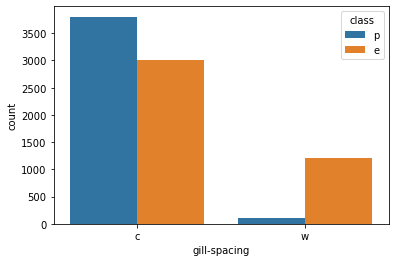

In [129]:
print(df_1['gill-spacing'].value_counts())
sns.countplot(data=df,x='gill-spacing',hue='class')
#NOT INDICATIVE

b    5612
n    2512
Name: gill-size, dtype: int64
class             e         p
gill-size                    
b          0.698503  0.301497
n          0.114650  0.885350


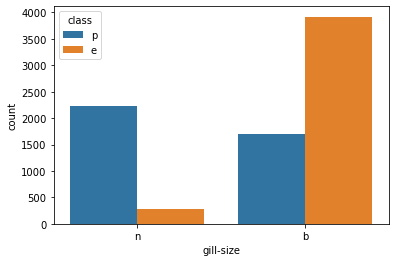

In [38]:
print(df_1['gill-size'].value_counts())
sns.countplot(data=df_1,x='gill-size',hue='class')

all=pd.crosstab(df_1['gill-size'],df['class'],margins=True)['All'] 
print(pd.crosstab(df_1['gill-size'],df['class']).divide(all,axis=0).dropna() )

#whenevr gill size=b/broad,it means 70%chances they are edible

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64


<AxesSubplot:xlabel='gill-color', ylabel='count'>

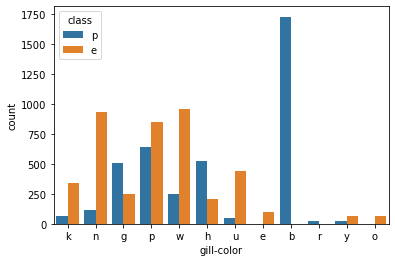

In [132]:
print(df['gill-color'].value_counts())
sns.countplot(data=df,x='gill-color',hue='class') # indicative since b =buff=higly pois 100% all are pois,
#INDICATIVE FEATURE

sns.countplot(data=df_1,x='gill-color',hue='bruises')
# hue=pop/odor/habitat/bruises takun pahilyavr odor,habitat nahi useful ethe
all=pd.crosstab(df_1['gill-color'],df['class'],margins=True)['All'] 
print(pd.crosstab(df_1['gill-color'],df['class']).divide(all,axis=0).dropna() )


b    0.770064
e    0.137863
c    0.068439
r    0.023634
Name: stalk-root, dtype: float64


<AxesSubplot:xlabel='stalk-root', ylabel='count'>

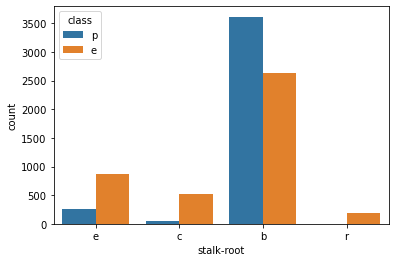

In [134]:
print(df_1['stalk-root'].value_counts(normalize=True))
sns.countplot(data=df_1,x='stalk-root',hue='class') # NOT indicative 

s    0.637125
k    0.291974
f    0.067947
y    0.002954
Name: stalk-surface-above-ring, dtype: float64
class         e         p
k      0.352941  5.460784
y      0.186047  0.093023


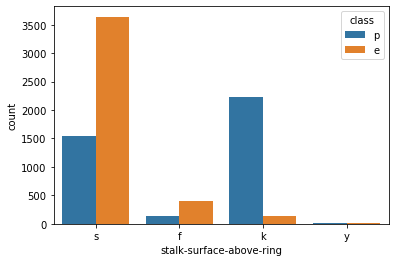

In [47]:
print(df_1['stalk-surface-above-ring'].value_counts(normalize=True))
sns.countplot(data=df_1,x='stalk-surface-above-ring',hue='class') # NOT INDICATIVE
ll=pd.crosstab(df_1['stalk-surface-above-ring'],df['class'],margins=True)['All'] 
ll
print(pd.crosstab(df_1['stalk-surface-above-ring'],df['class']).divide(all,axis=0).dropna() )

s    4936
k    2304
f     600
y     284
Name: stalk-surface-below-ring, dtype: int64


<AxesSubplot:xlabel='stalk-surface-below-ring', ylabel='count'>

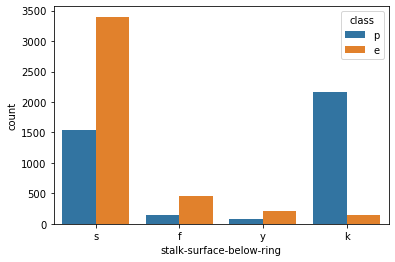

In [137]:
print(df_1['stalk-surface-below-ring'].value_counts())
sns.countplot(data=df_1,x='stalk-surface-below-ring',hue='class') # NOT indicative

w    0.549483
p    0.230428
g    0.070901
n    0.055145
b    0.053176
o    0.023634
e    0.011817
c    0.004431
y    0.000985
Name: stalk-color-above-ring, dtype: float64


<AxesSubplot:xlabel='stalk-color-above-ring', ylabel='count'>

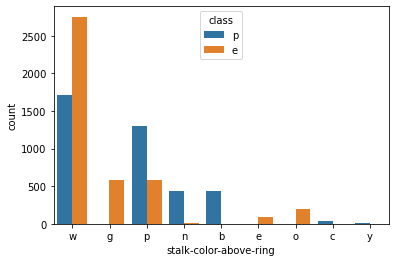

In [138]:
print(df_1['stalk-color-above-ring'].value_counts(normalize=True))
sns.countplot(data=df_1,x='stalk-color-above-ring',hue='class') #not indicative 

w    0.539636
p    0.230428
g    0.070901
n    0.063023
b    0.053176
o    0.023634
e    0.011817
c    0.004431
y    0.002954
Name: stalk-color-below-ring, dtype: float64


<AxesSubplot:xlabel='stalk-color-below-ring', ylabel='count'>

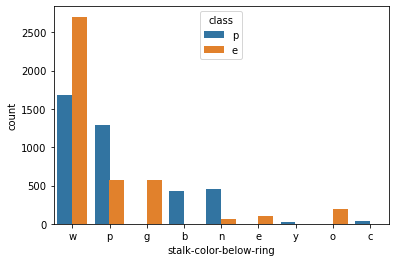

In [139]:
print(df_1['stalk-color-below-ring'].value_counts(normalize=True))
sns.countplot(data=df_1,x='stalk-color-below-ring',hue='class') #not indicative

o    7488
t     600
n      36
Name: ring-number, dtype: int64


<AxesSubplot:xlabel='ring-number', ylabel='count'>

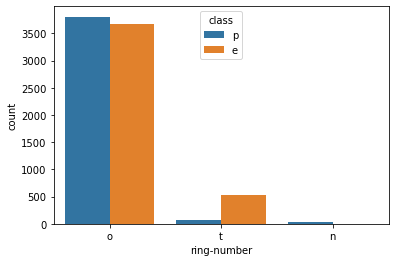

In [141]:
print(df_1['ring-number'].value_counts())
sns.countplot(data=df_1,x='ring-number',hue='class') 


p    0.488429
e    0.341704
l    0.159527
f    0.005908
n    0.004431
Name: ring-type, dtype: float64
class          e          p
e      10.500000  18.416667
n       0.000000   0.034351
p       2.112601   0.546917


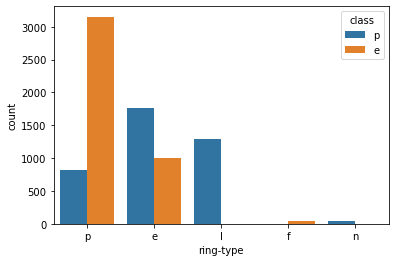

In [50]:
print(df_1['ring-type'].value_counts(normalize=True))
sns.countplot(data=df_1,x='ring-type',hue='class') 
ll=pd.crosstab(df_1['ring-type'],df['class'],margins=True)['All'] 
print(pd.crosstab(df_1['ring-type'],df['class']).divide(all,axis=0).dropna() )

w    0.293944
n    0.242245
k    0.230428
h    0.200886
r    0.008863
u    0.005908
o    0.005908
y    0.005908
b    0.005908
Name: spore-print-color, dtype: float64


<AxesSubplot:xlabel='spore-print-color', ylabel='count'>

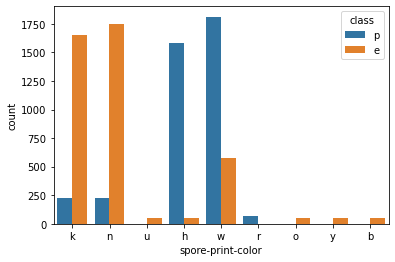

In [145]:
print(df_1['spore-print-color'].value_counts(normalize=True))
sns.countplot(data=df_1,x='spore-print-color',hue='class') 

In [172]:
from dython.nominal import associations  # using dython library

# Checking association/correlation between categorical variables using theil'u







Why theils_u??    Why not chi2,crammer's v?







Please refer below blog


https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

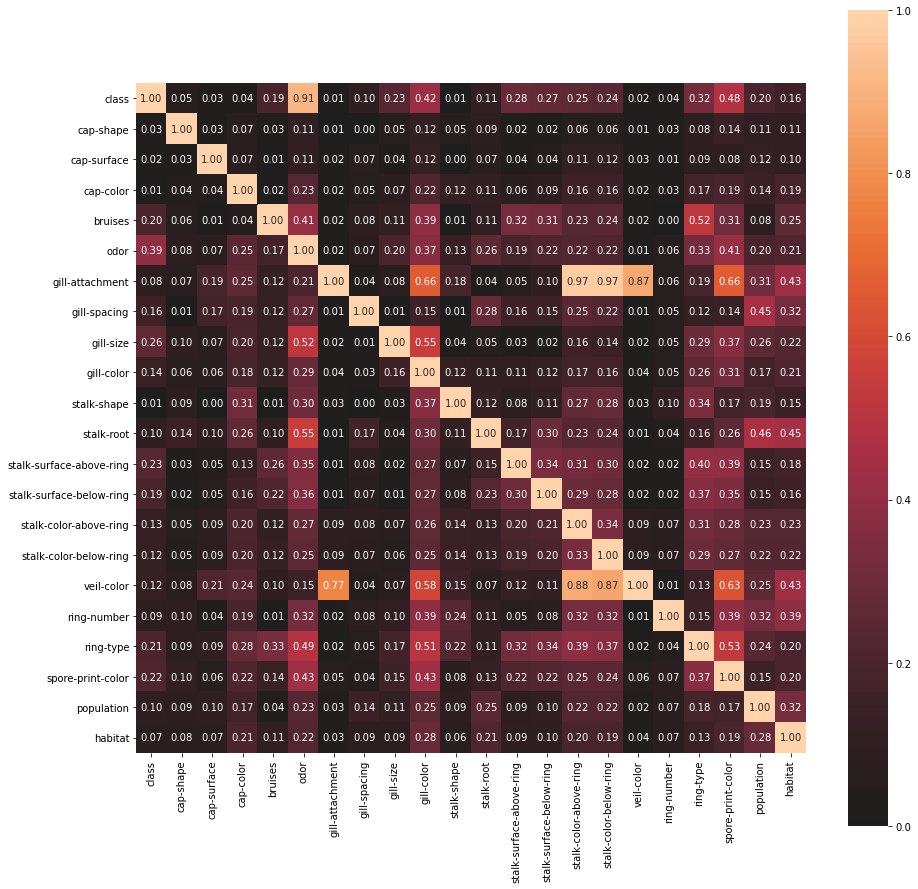

{'corr':                              class  cap-shape  cap-surface  cap-color  \
 class                     1.000000   0.048842     0.028617   0.036083   
 cap-shape                 0.029522   1.000000     0.030204   0.067283   
 cap-surface               0.018147   0.031688     1.000000   0.070244   
 cap-color                 0.014361   0.044305     0.044089   1.000000   
 bruises                   0.196440   0.057126     0.013462   0.041292   
 odor                      0.390648   0.080488     0.071845   0.245707   
 gill-attachment           0.081818   0.069684     0.186513   0.251221   
 gill-spacing              0.158154   0.007295     0.166868   0.193235   
 gill-size                 0.257946   0.098364     0.068052   0.202591   
 gill-color                0.137597   0.063356     0.063236   0.180369   
 stalk-shape               0.007616   0.085221     0.004689   0.310193   
 stalk-root                0.100614   0.142337     0.099378   0.258892   
 stalk-surface-above-ring  0.2

In [186]:
associations(df_1_o1, nom_nom_assoc='theil', figsize=(15, 15))# 

In [ ]:
# Features Scaling-Normalization or Standardization??

#Google- Normalization or std on Categorical Features?
#Normalization/standardization of features is done to bring all features to a similar scale. 
#When you one hot encode categorical variables they are either 0/1 hence there is not much scale difference like 10~1000,
#hence there is no need to apply techniques for normalization/standardization.


#https://stats.stackexchange.com/questions/399430/does-categorical-variable-need-normalization-standardization#:~:text=Normalization%2Fstandardization%20of%20features%20is,apply%20techniques%20for%20normalization%2Fstandardization.

# Converting output feeature to numerical using LabelEncoder

In [15]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_1['class']=le.fit_transform(df_1['class'])

In [16]:
df_1['class']

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [17]:
df['class']

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

# Splitting the dataset into Training and Testing

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_1.drop(columns=['class']),df_1['class'],test_size=0.2)

In [19]:
X_train.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# CONVERTING CATEGORICAL INPUT FEATURES TO NUMERICAL ,TO APPLY MODELS


In [21]:

t1 = ColumnTransformer(transformers=[
                  ('t11',OneHotEncoder(sparse=False,drop='first'),['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-spacing', 'gill-size', 'gill-color','stalk-root','stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat'])
],remainder='passthrough')

In [22]:
t1.fit_transform(X_train).shape

(6499, 89)

In [23]:
X_train_encoded = t1.fit_transform(X_train)
X_test_encoded = t1.fit_transform(X_test)

X_test_encoded.shape

(1625, 89)

In [149]:
#X_train=t1.fit_transform(X_train).reshape(-1,1)

In [24]:
#Apply different classfication algo's

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# MODEL BUILDING

In [25]:
# MODEL BUILDING

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [38]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [58]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred_train= clf.predict(X_train)

    y_pred_test = clf.predict(X_test)
    train_accuracy=accuracy_score(y_train,y_pred_train)
    test_accuracy = accuracy_score(y_test,y_pred_test)
    recall = recall_score(y_test,y_pred)
    
    return train_accuracy,test_accuracy,precision

In [59]:
print(train_classifier(svc,X_train_encoded,y_train,X_test_encoded,y_test))

(0.6556393291275581, 0.6547692307692308, 1.0)


# Defining Performance Metrics



Accuracy is must here,along with that we have to reduce Type-2 error,because if mushroom is poisonous,still model is classifying
it as a edible,then it'll lead to human life diaster,so recall is best here

hence I'll take accuracy,recall.

finally model whose above two Performance Metrics are high,I'll go with it.

In [61]:
train_accu= []
test_accu=[]
recall_scores = []

for name,clf in clfs.items():
    
    train_acc,test_acc,current_recall = train_classifier(clf, X_train_encoded,y_train,X_test_encoded,y_test)
    
    print("For ",name)
    print("train accuracy - ",train_acc)
    print("test accuracy -",test_acc)
    print("Precision - ",current_recall)
    
    train_accu.append(train_acc)
    test_accu.append(test_acc)
    recall_scores.append(current_recall)

For  SVC
train accuracy -  0.6556393291275581
test accuracy - 0.6547692307692308
Precision -  1.0


C:\Users\Guest\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Guest\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

For  KN
train accuracy -  1.0
test accuracy - 1.0
Precision -  1.0
For  NB
train accuracy -  0.9559932297276504
test accuracy - 0.9544615384615385
Precision -  1.0
For  DT
train accuracy -  0.9963071241729496
test accuracy - 0.9981538461538462
Precision -  1.0
For  LR
train accuracy -  1.0
test accuracy - 1.0
Precision -  1.0
For  RF
train accuracy -  1.0
test accuracy - 1.0
Precision -  1.0
For  AdaBoost
train accuracy -  1.0
test accuracy - 1.0
Precision -  1.0
For  BgC
train accuracy -  1.0
test accuracy - 1.0
Precision -  1.0
For  ETC
train accuracy -  1.0
test accuracy - 1.0
Precision -  1.0
For  GBDT
train accuracy -  0.9995383905216187
test accuracy - 1.0
Precision -  1.0
For  xgb
train accuracy -  1.0
test accuracy - 1.0
Precision -  1.0


In [62]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Train_Accuracy':train_accu,'Test_Accuracy':test_accu,'Recall':recall_scores}).sort_values('Recall',ascending=False)
performance_df

,Algorithm,Train_Accuracy,Test_Accuracy,Recall
0,SVC,0.655639,0.654769,1.0
1,KN,1.000000,1.000000,1.0
2,NB,0.955993,0.954462,1.0
3,DT,0.996307,0.998154,1.0
4,LR,1.000000,1.000000,1.0
5,RF,1.000000,1.000000,1.0
6,AdaBoost,1.000000,1.000000,1.0
7,BgC,1.000000,1.000000,1.0
8,ETC,1.000000,1.000000,1.0
9,GBDT,0.999538,1.000000,1.0


In [64]:
performance_df1 = pd.melt(performance_df[['Algorithm','Test_Accuracy','Recall']], id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Test_Accuracy,0.654769
1,KN,Test_Accuracy,1.000000
2,NB,Test_Accuracy,0.954462
3,DT,Test_Accuracy,0.998154
4,LR,Test_Accuracy,1.000000
5,RF,Test_Accuracy,1.000000
6,AdaBoost,Test_Accuracy,1.000000
7,BgC,Test_Accuracy,1.000000
8,ETC,Test_Accuracy,1.000000
9,GBDT,Test_Accuracy,1.000000


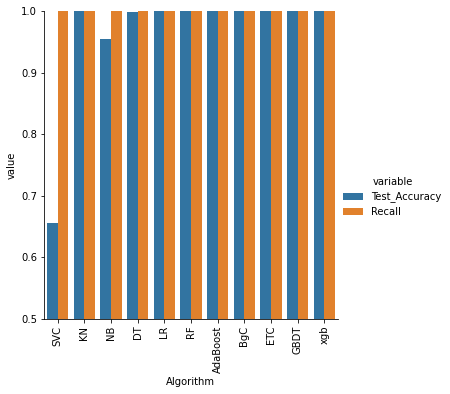

In [65]:
#MODEL EVALUATION


sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [44]:
# Voting Classifier
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('knc', knc), ('dtc', dtc), ('lrc', lrc)],voting='soft')
voting.fit(X_train_encoded,y_train)


y_pred = voting.predict(X_test_encoded)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))

Accuracy 1.0
Recall 1.0


In [47]:
# Applying stacking
estimators=[('knc', knc), ('dtc', dtc), ('lrc', lrc)]
final_estimator=RandomForestClassifier()

from sklearn.ensemble import StackingClassifier
stack_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [48]:
stack_clf.fit(X_train_encoded,y_train)
y_pred = clf.predict(X_test_encoded)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))

Accuracy 1.0
Precision 1.0


In [67]:
knn_clf =knc.fit(X_train_encoded,y_train)
print('Train Accuracy:', accuracy_score(y_train, knn_clf.predict(X_train_encoded)))
    
print('Test Accuracy:',accuracy_score(y_test, knn_clf.predict(X_test_encoded)))

confusion_matrix(y_test,knn_clf.predict(X_test_encoded))

C:\Users\Guest\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train Accuracy: 1.0


C:\Users\Guest\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test Accuracy: 1.0


C:\Users\Guest\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[821,   0],
       [  0, 804]], dtype=int64)

# Final Model Evaluation

As you can see Many machine learning algo's are giving good results,without too much hyperparameter tuning.

And Many models have same high performance,so we will select the final model who is simple to implement(implementation,space,time complexity low).

In our case,K-Nearest Neighbor(KNN) Algorithm is simple in sklearn implemenation,so we'll opt for KNN Classifier.

In [24]:
df_1.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

#  YEAH !!!  MODEL IS READY JUST DEPLOY IT

In [68]:
import pickle
pickle.dump(mnb,open('knn_clf.pkl','wb'))